<a href="https://colab.research.google.com/github/RNSS/RNSS/blob/main/IT351_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data wrangling
import numpy as np
import pandas as pd

In [ ]:
#visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
#default theme
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
#spliting data into train and test
from sklearn.model_selection import train_test_split
#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 2.  Data Acquisition

In [ ]:
#Upload from Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


### Train Data set

In [ ]:
#train_data = pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 9/IT351/project/train.csv")
train_data = pd.read_csv("train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Test Data set

In [ ]:
#test_data = pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 9/IT351/project/test.csv")
test_data = pd.read_csv("test.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# 3. Exploratory Analysis

### Train Data set

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Graphical Techniques 

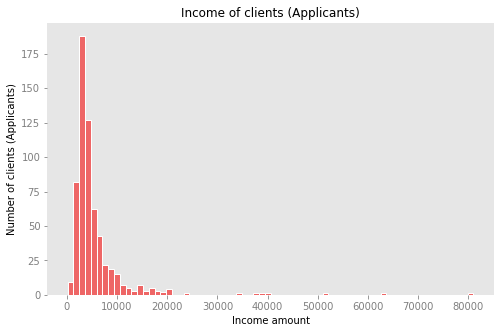

In [ ]:
plt.subplots(figsize=(8,5))
train_data['ApplicantIncome'].hist(bins=70,grid=False,edgecolor='white') 
plt.xlabel('Income amount')
plt.ylabel('Number of clients (Applicants)') 
plt.title('Income of clients (Applicants)')
plt.show()

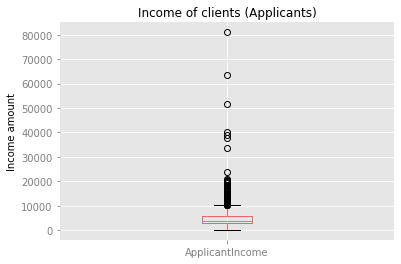

In [ ]:
train_data.boxplot(column = 'ApplicantIncome')
plt.ylabel('Income amount') 
plt.title('Income of clients (Applicants)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


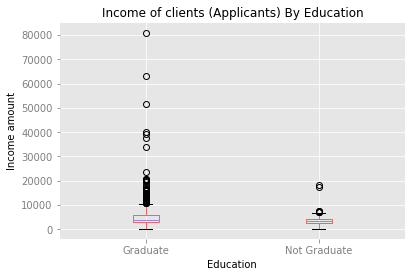

In [ ]:
train_data.boxplot(column = 'ApplicantIncome',  by = 'Education')
plt.ylabel('Income amount') 
plt.title('Income of clients (Applicants) By Education')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


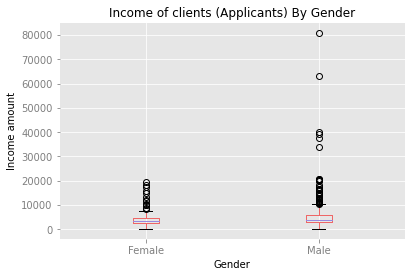

In [ ]:
train_data.boxplot(column = 'ApplicantIncome', by = 'Gender')
plt.ylabel('Income amount') 
plt.title('Income of clients (Applicants) By Gender')
plt.suptitle('')
plt.show()

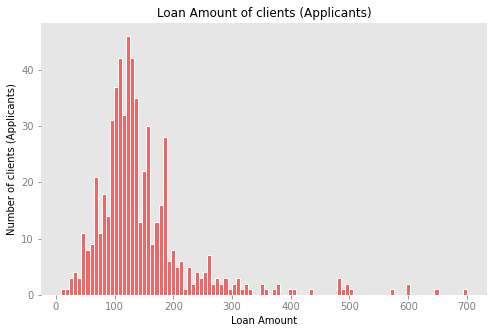

In [ ]:
plt.subplots(figsize=(8,5))
train_data['LoanAmount'].hist(bins=100,grid = False,edgecolor='white')
plt.xlabel('Loan Amount')
plt.ylabel('Number of clients (Applicants)') 
plt.title('Loan Amount of clients (Applicants)')
plt.show()

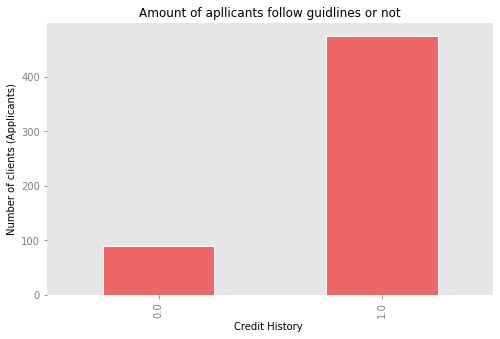

In [ ]:
plt.subplots(figsize=(8,5))
temp = train_data['Credit_History'].value_counts(ascending = True)
temp.plot(kind = 'bar',grid = False,edgecolor='white')
plt.xlabel('Credit History ')
plt.ylabel('Number of clients (Applicants)') 
plt.title('Amount of apllicants follow guidlines or not')
plt.show()

### Test Data set

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# 4. Process/Clean Data

## Train Data set

#### 1: Handle missing values 

In [ ]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [ ]:
train_data['Self_Employed'].fillna('No',inplace=True)

In [ ]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [ ]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 2: Lable Encoding

In [ ]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
    print(i,"  :  ", le.classes_)
train_data.head(20) 

Gender   :   ['Female' 'Male']
Married   :   ['No' 'Yes']
Dependents   :   ['0' '1' '2' '3+']
Education   :   ['Graduate' 'Not Graduate']
Self_Employed   :   ['No' 'Yes']
Property_Area   :   ['Rural' 'Semiurban' 'Urban']
Loan_Status   :   ['N' 'Y']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
print(le.classes_)

['N' 'Y']


####3: Drop unaffected label

In [ ]:
train_data.drop('Loan_ID',axis=1,inplace=True)

##Test Data set

#### 1: Handle missing values 

In [ ]:
test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [ ]:
test_data['Self_Employed'].fillna('No',inplace=True)

In [ ]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

In [ ]:
test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### 2: Lable Encoding

In [ ]:
var_mod_test = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in var_mod_test:
    test_data[i] = le.fit_transform(test_data[i])
    print(i,"  :  ", le.classes_)
test_data.head() 

Gender   :   ['Female' 'Male']
Married   :   ['No' 'Yes']
Dependents   :   ['0' '1' '2' '3+']
Education   :   ['Graduate' 'Not Graduate']
Self_Employed   :   ['No' 'Yes']
Property_Area   :   ['Rural' 'Semiurban' 'Urban']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


####3: Drop unaffected label

In [ ]:
test_data.drop('Loan_ID',axis=1,inplace=True)

# Corrlation Matrix

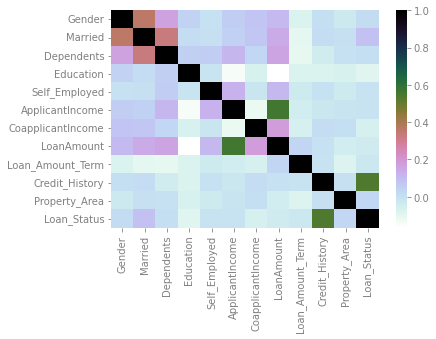

In [ ]:
sns.heatmap(train_data.corr() ,cmap='cubehelix_r')

# 5. Model Generation & Evaluation 


In [ ]:
Y = train_data['Loan_Status']
X = train_data.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
print("X_train = ",len(X_train),"\nX_test=",len(X_test))

X_train =  429 
X_test= 185


### Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict_DT = DT.predict(X_test)

In [ ]:
DT_SC = accuracy_score(predict_DT,y_test)
print(classification_report(y_test, predict_DT))
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        45
           1       0.85      0.71      0.78       140

    accuracy                           0.69       185
   macro avg       0.63      0.66      0.63       185
weighted avg       0.74      0.69      0.70       185

68.65% Accurate


### Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predict_LR = LR.predict(X_test)

In [ ]:
LR_SC = accuracy_score(predict_LR,y_test)
print(classification_report(y_test, predict_LR))
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.85      0.49      0.62        45
           1       0.86      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.85      0.85      0.84       185

85.41% Accurate


### Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)

In [ ]:
RF_SC = accuracy_score(y_test,predict_RF)
print(classification_report(y_test, predict_RF))
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        45
           1       0.85      0.93      0.89       140

    accuracy                           0.82       185
   macro avg       0.77      0.71      0.73       185
weighted avg       0.81      0.82      0.81       185

82.16% Accurate


#Use The best model 

In [ ]:
test_data['Loan_Status'] = LR.predict(test_data)
test_data['Loan_Status'].value_counts()

1    306
0     61
Name: Loan_Status, dtype: int64

In [ ]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
